# 🔥 Huấn luyện mô hình YOLOv5 để nhận diện lửa

## Giới thiệu
Nhận diện lửa là một ứng dụng quan trọng trong phòng cháy chữa cháy, giúp phát hiện sớm các nguy cơ cháy nổ để có biện pháp xử lý kịp thời.  
## Mục tiêu
✔️ Cài đặt và thiết lập **YOLOv5**.  
✔️ Chuẩn bị **tập dữ liệu hình ảnh về lửa**.  
✔️ Huấn luyện **mô hình nhận diện lửa**.  
✔️ Đánh giá mô hình bằng các chỉ số hiệu suất như _Confusion Matrix_.

1. Cài đặt YOLOv5 và các thư viện cần thiết

In [1]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17270, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 17270 (delta 0), reused 0 (delta 0), pack-reused 17269 (from 2)
Receiving objects: 100% (17270/17270), 16.11 MiB | 29.19 MiB/s, done.
Resolving deltas: 100% (11861/11861), done.
/kaggle/working/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.9/932.9 kB 25.7 MB/s eta 0:00:0000:01


2. Xác định đường dẫn dataset và kiểm tra dataset

In [3]:
dataset_path = "/kaggle/input/fire-data/datasets"
yaml_path = f"{dataset_path}/fire.yaml"

In [4]:
import os

# Kiểm tra thư mục dataset có tồn tại không
if os.path.exists(dataset_path):
    print("✅ Dataset tồn tại:", dataset_path)
    print("📂 Danh sách file trong dataset:", os.listdir(dataset_path))
else:
    print("❌ Lỗi: Dataset không tồn tại! Kiểm tra lại đường dẫn.")

✅ Dataset tồn tại: /kaggle/input/fire-data/datasets
📂 Danh sách file trong dataset: ['fire.yaml', 'val', 'train']


3. Huấn luyện mô hình

In [ ]:
import os
print("Dataset files:", os.listdir(dataset_path))

# 4️⃣ Huấn luyện YOLOv5 với file YAML đã upload
!python train.py --img 640 --batch 16 --epochs 70 --data /kaggle/input/fire-data/datasets/fire.yaml --weights yolov5s.pt --device 0
'''
Huấn luyện mô hình với:
Kích thước ảnh: 640x640
Batch size: 16
Epochs: 70
Sử dụng file fire.yaml chứa thông tin dataset.'
'''

Dataset files: ['fire.yaml', 'val', 'train']
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-03-12 08:31:11.879060: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-12 08:31:12.075966: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-12 08:31:12.132227: E external/local_xla/xla/stream_ex

4. Hiển thị ma trận nhầm lẫn (Confusion Matrix)

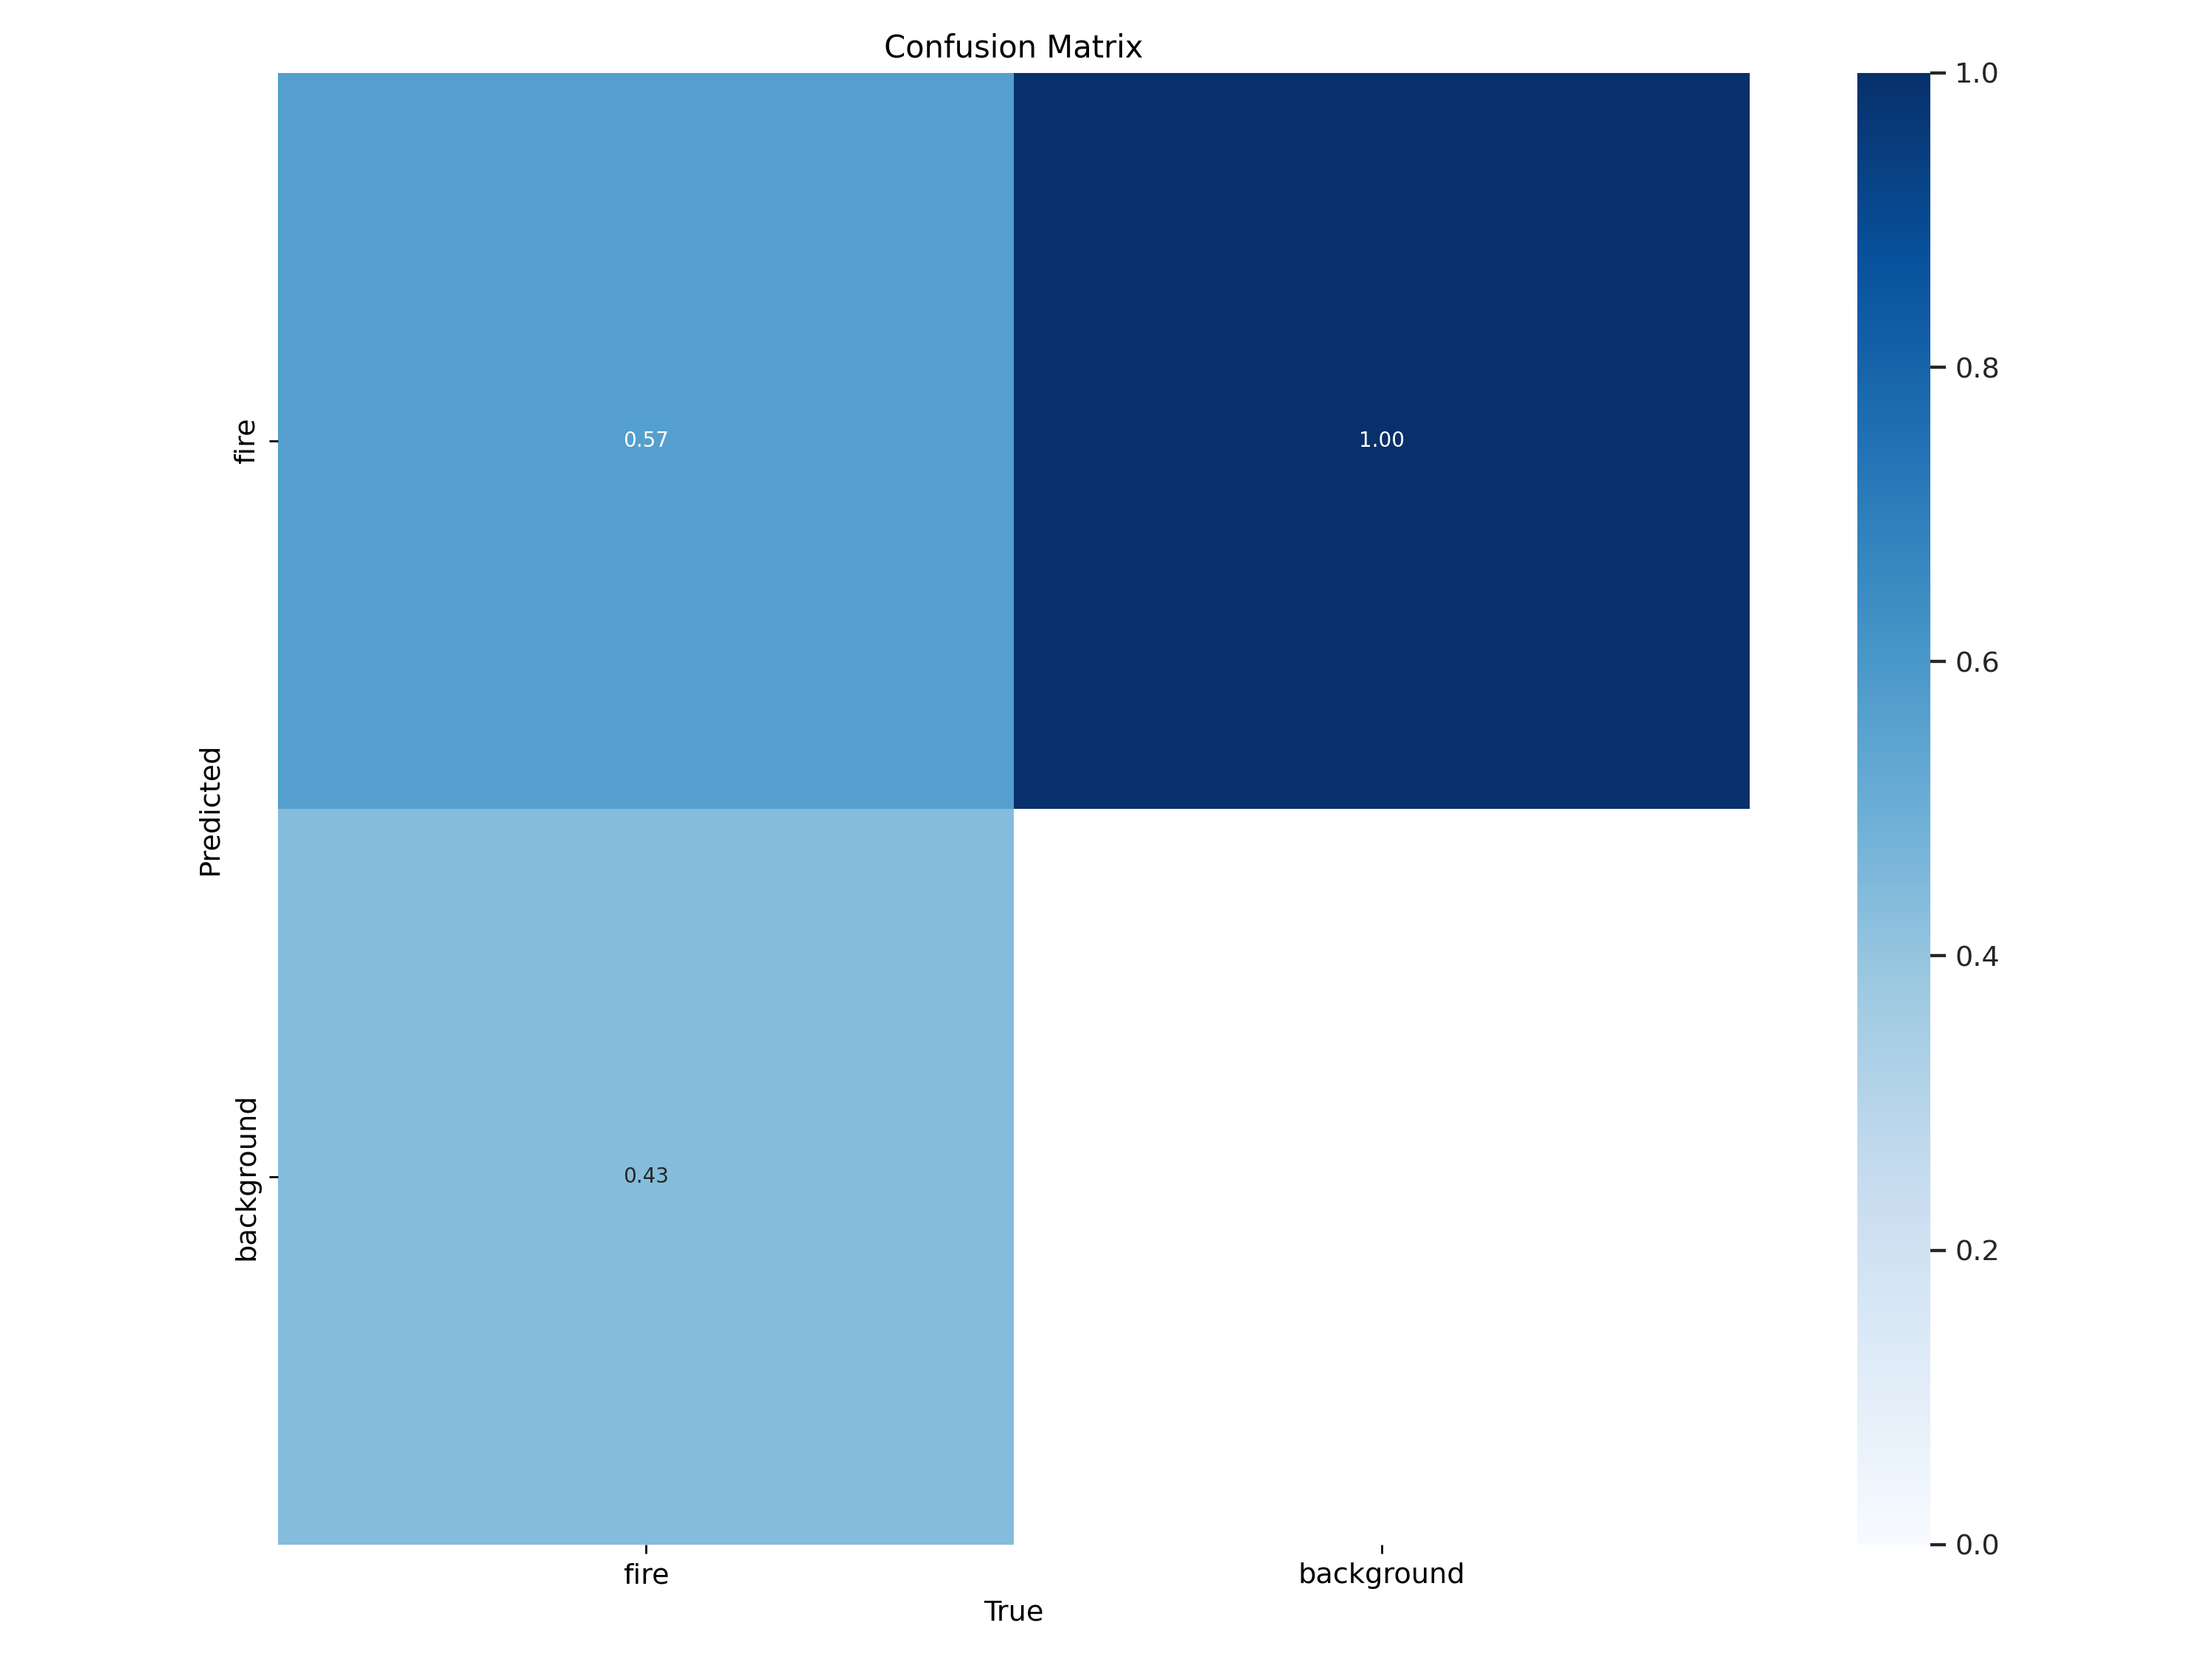

In [6]:
from IPython.display import Image

# Hiển thị Confusion Matrix
Image(filename='runs/train/exp/confusion_matrix.png', width=600)


# Phân Tích Ma Trận Nhầm Lẫn (Confusion Matrix)

## 1. Đánh Giá Hiệu Suất
- **Chính xác khi dự đoán "fire"**: **57%**
- **Nhầm lẫn "fire" thành "background"**: **43%**
- **Chính xác khi dự đoán "background"**: **100%**
- **Nhầm lẫn "background" thành "fire"**: **0%**

## 2. Tính Độ Chính Xác Tổng Thể (Accuracy)

### Công thức tính độ chính xác:
$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$  

Với:
- **TP (True Positive) = 57%** (fire được dự đoán đúng)
- **TN (True Negative) = 100%** (background được dự đoán đúng)
- **FP (False Positive) = 0%** (không có background bị nhầm thành fire)
- **FN (False Negative) = 43%** (fire bị nhầm thành background)

Tính toán:

$$
Accuracy = \frac{0.57 + 1.00}{0.57 + 1.00 + 0 + 0.43} = \frac{1.57}{2} = 0.785 = 78.5\%
$$

## 3. Kết Luận
- Mô hình có độ chính xác tổng thể **78.5%**.
- Dự đoán "background" rất chính xác (**100%**).
- Tuy nhiên, **43% ảnh "fire" bị nhầm thành "background"**.
- Cần **cải thiện khả năng nhận diện "fire"** để giảm lỗi nhầm lẫn.

